# Import all the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

# Exploratory Data Analysis

## Load the data set

In [60]:
bde = load_boston()

bde is actually a dictionary so we can see all the available keys

In [113]:
print(bde.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


## Checkout the data

In [74]:
print(bde.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [114]:
print(bde.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [115]:
print(bde.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [116]:
print(bde.data.shape)

(506, 13)


as you can see here we have 506 samples with 13 features available

## Convert it into a Dataframe

In [78]:
bde_df = pd.DataFrame(bde.data,columns=bde.feature_names)
bde_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


but this dataframe seems to be missing the price column which exists in the target key of the dataset dictionary. we can add those in price column of created dataframe

In [82]:
bde_df = bde_df.assign(price = bde.target)
bde_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Dataframe info

In [118]:
bde_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Summary Statistics of the dataset

In [119]:
bde_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Lets take a look at the price distribution of the available house data

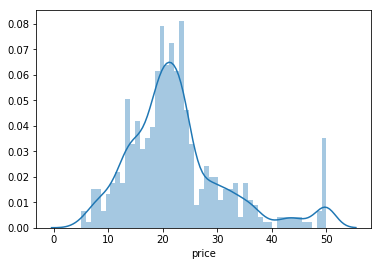

In [121]:
sns.distplot(bde_df['price'],bins=50)

# Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
bde_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

lets __y__ be to __target value__ ie. Boston House Prices
and __X__ be the __predictor value__ ie. all the other features

In [85]:
X = bde_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = bde_df['price']

40% of the samples will be used for testing the prediction model

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4)

In [89]:
X_train.shape

(303, 13)

In [123]:
y_train.shape

(303,)

# Creating and Training Model

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lm = LinearRegression()

In [104]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation

In [105]:
lm.intercept_

31.608132772421175

### Interpreting the co-efficients

In [106]:
pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficient'])

,Coefficient
CRIM,-0.125602
ZN,0.047122
INDUS,0.061008
CHAS,2.215125
NOX,-17.972806
RM,4.200678
AGE,0.014899
DIS,-1.372674
RAD,0.316464
TAX,-0.012366


The Co-efficients of each of the features can be interpreted as follows:
 - If we hold all other features fixed, a __1 unit increase in the individual feature value (eg. CRIM)__ is associated with __0.12 decrease in the price of the house__ and likewise for all other co-efficients

# Predictions from our Model

In [127]:
predictions = lm.predict(X_test)
predictions

array([19.87782669, 33.04965198, 23.52690303, 33.11068999,  8.66922559,
       21.36895208, 27.57038557,  5.26781215, 22.65928725, 23.33113914,
       11.83254874, 11.5233913 , 16.50564312, 26.29103465, 18.68464207,
       37.21311016, 12.84617039, 12.2564579 , 20.60377422, 18.07897983,
       26.81486687, 25.13913318, 20.72292765, -1.16921831, 20.03165678,
       24.41988327, 37.89763302, 15.19976036, 12.98968535, 15.74934369,
       16.59433679, 24.17970557, 30.27733082, 19.74218434, 33.65132369,
       15.93690943, 35.57731115, 20.48344596, 10.5246694 , 20.80560343,
       10.80393   , 44.79550896, 33.74006205, 18.12913884, 26.11944572,
       22.17696446, 36.87019909, 21.75000836, 26.27588297,  9.40581536,
       31.68556329,  1.32002275, 17.78191457,  4.81059937, 16.66804917,
       27.33202432, 16.82318349, 37.48994938, 31.60076129, 14.87502407,
       22.75308733, 13.94931538, 25.78533054, 35.49734528, 19.60721202,
       16.85790306, 20.07501246, -7.62701818, 21.32428886, 17.40

Text(0.5,1,'Actual Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

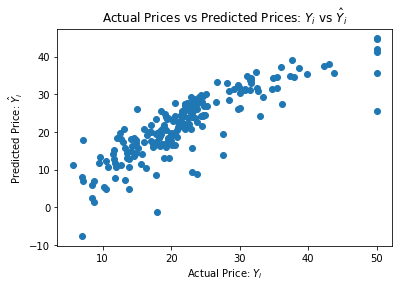

In [131]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Price: $Y_i$')
plt.ylabel('Predicted Price: $\hat{Y}_i$')
plt.title('Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')

 - Ideally, the scatter plot should create a linear line. Since the model does not fit 100%, the scatter plot is not creating a linear line

# Regression Evaluation Metrics

In [110]:
from sklearn import metrics

### Mean Squared Error

In [133]:
print('MSE:',metrics.mean_squared_error(y_test,predictions))

MSE: 24.00834069580924


### Root Mean Squared Error

In [134]:
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE 4.899830680320417


# Conclusion

### Distribution plot/Histogram of the residuals

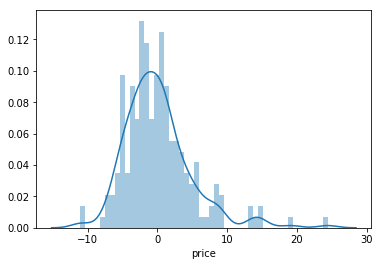

In [135]:
sns.distplot((y_test-predictions),bins=50)

 - If the residuals are normally distributed as in our case, it indicates that this model was a correct choice for the data